## A1 Lab de ciência de dados 2022

Felipe Castro

Pedro pereira

Arthur Mendes

Alexandre Almeida


Referencias iniciais:

Artigo principal: "K-Means Stock Clustering Analysis Based on Historical Price Movements and Financial Ratios" de Shu Bin da Claremont McKenna College (2020)

https://medium.com/analytics-vidhya/constructing-a-killer-investment-portfolio-with-python-51f4f0d344be: \

https://youtu.be/bvDkel5whUY \

https://www.dataquest.io/blog/portfolio-project-predicting-stock-prices-using-pandas-and-scikit-learn/ \

https://www.investopedia.com/terms/c/cluster_analysis.asp \

https://github.com/codigoquant/python_para_investimentos/blob/master/25_BackTesting_de_Carteira_com_Python_Parte_2_(BT).ipynb \

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-small-cap-smll-composicao-da-carteira.htm \

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm \

Nós trabalhamos com Python, pois é a linguagem que todos os integrantes do grupo estão mais familiarizados.

## Bibliotecas e dados

In [ ]:
#instalando Libraries
!pip install yfinance
!pip install bt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for bt: filename=bt-0.2.9-cp37-cp37m-linux_x86_64.whl size=765307 sha256=7e04d1917e66da88790218e411dd72d3d2c726126eaafe62b97182fbba9f8044
  Stored in directory: /root/.cache/pip/wheels/c5/1a/3f/b56e6064b766c107f25e200969161c09ca6868cbfe0eaa31e4
Successfully built bt


In [ ]:
#Importando Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sb
from sklearn.cluster import KMeans
import bt

#definindo estilo dos gráficos
plt.style.use('fivethirtyeight')

#baixa os CSVs com nome das ações que serão usadas
!git clone https://github.com/Kastro5/datasets-lab.git

!ls
%matplotlib inline

Cloning into 'datasets-lab'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
datasets-lab  sample_data


Os arquivos CSV podem ser obtidos diretamente do nosso repositório no GitHub. Os links da origem desses csv estão disponíveis nas referências. Queremos apenas os tickers para obtermos os dados pelo YFinance.

In [ ]:
bov = pd.read_csv('/content/datasets-lab/IBOVDia_26-09-22.csv',sep=';', encoding='latin-1',skiprows=1)      ##  Le os CSVs contendo 
small = pd.read_csv('/content/datasets-lab/SMLLDia_26-09-22.csv', sep=';', encoding='latin-1',skiprows=1)   ##  tickers das ações

Fazemos uma lista com todos os índices e removemos os dois últimos elementos (já que não são tickers), tanto para Ibovespa quanto para Small Caps.

In [ ]:
list_bov=list(bov.index)  
list_bov.pop()
list_bov.pop()
list_small=list(small.index)
list_small.pop()
list_small.pop()

'Quantidade Teórica Total'

Removendo duplicatas, adicionando ".SA" ao final de cada string e baixando os dados:

In [ ]:
stocks=list(set(list_bov+list_small))
stocksSA=[]
for i in stocks:
  stocksSA.append(i+'.SA')
dados = yf.download(stocksSA, start="2017-09-24", end="2022-09-24")

[*********************100%***********************]  192 of 192 completed


## Cálculo das métricas

In [ ]:
retorno_diario_simples = dados['Adj Close'].pct_change().dropna() #calcula o retorno diario dos ativos em porcentagem e remove os NaN
retorno_diario_medio = retorno_diario_simples.mean()  #calcula a porcentagem média
retorno_anual_medio = retorno_diario_medio*252 #anualiza para obtermos o retorno anual médio
volatilidade = retorno_diario_simples.std()*(252)**(1/2)  #calcula a volatilidade #utilizamos o desvio padrão como medida de volatilidade

Vamos juntar as métricas calculadas para todos os ativos em um só dataframe.

In [ ]:
df=pd.DataFrame([retorno_anual_medio, volatilidade],['retorno anual médio','volatilidade']) #cria um dataframe unico contendo os dados
df=df.T #faz a transposta

## Clusterização

# Começamos utilizando o método do cotovelo para encontrarmos o número ótimo de clusters.
 O método de cotovelo é um heurístico usado para determinar o número de clusters em um conjunto de dados. O método consiste em traçar a variação explicada como uma função do número de clusters e escolher o cotovelo da curva como o número de clusters a serem utilizados.

In [ ]:
x = df[['retorno anual médio', 'volatilidade']].values
inertia_list=[]
for k in range(2,36):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x)
  inertia_list.append(kmeans.inertia_)

Plotamos a curva de cotovelo

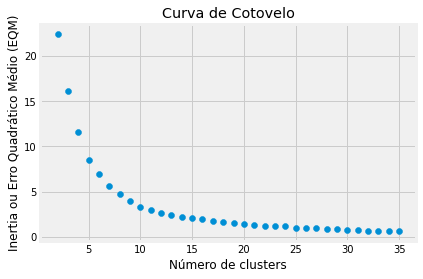

In [ ]:
plt.scatter(range(2,36),inertia_list)
plt.title('Curva de Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia ou Erro Quadrático Médio (EQM)')
plt.show()

Veja que K=10 é uma boa quantidade de clusters.

# Agora utilizamos o método K-Means para clusterizar:

O K-means visa dividir n observações em k clusters nos quais cada observação pertence ao cluster com a média mais próxima 

In [ ]:
kmeans=KMeans(n_clusters=10).fit(x)
labels=kmeans.labels_

In [ ]:
df['Cluster_labels']=labels

<function matplotlib.pyplot.show(*args, **kw)>

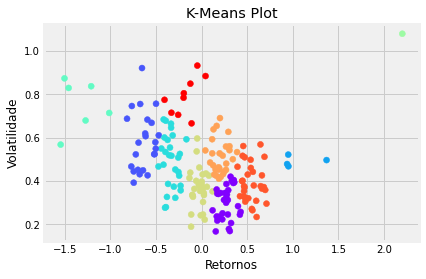

In [ ]:
#Plot dos clusters
plt.scatter(x[:,0], x[:,1],c=labels, cmap='rainbow')
plt.title('K-Means Plot')
plt.xlabel('Retornos')
plt.ylabel('Volatilidade')
plt.show

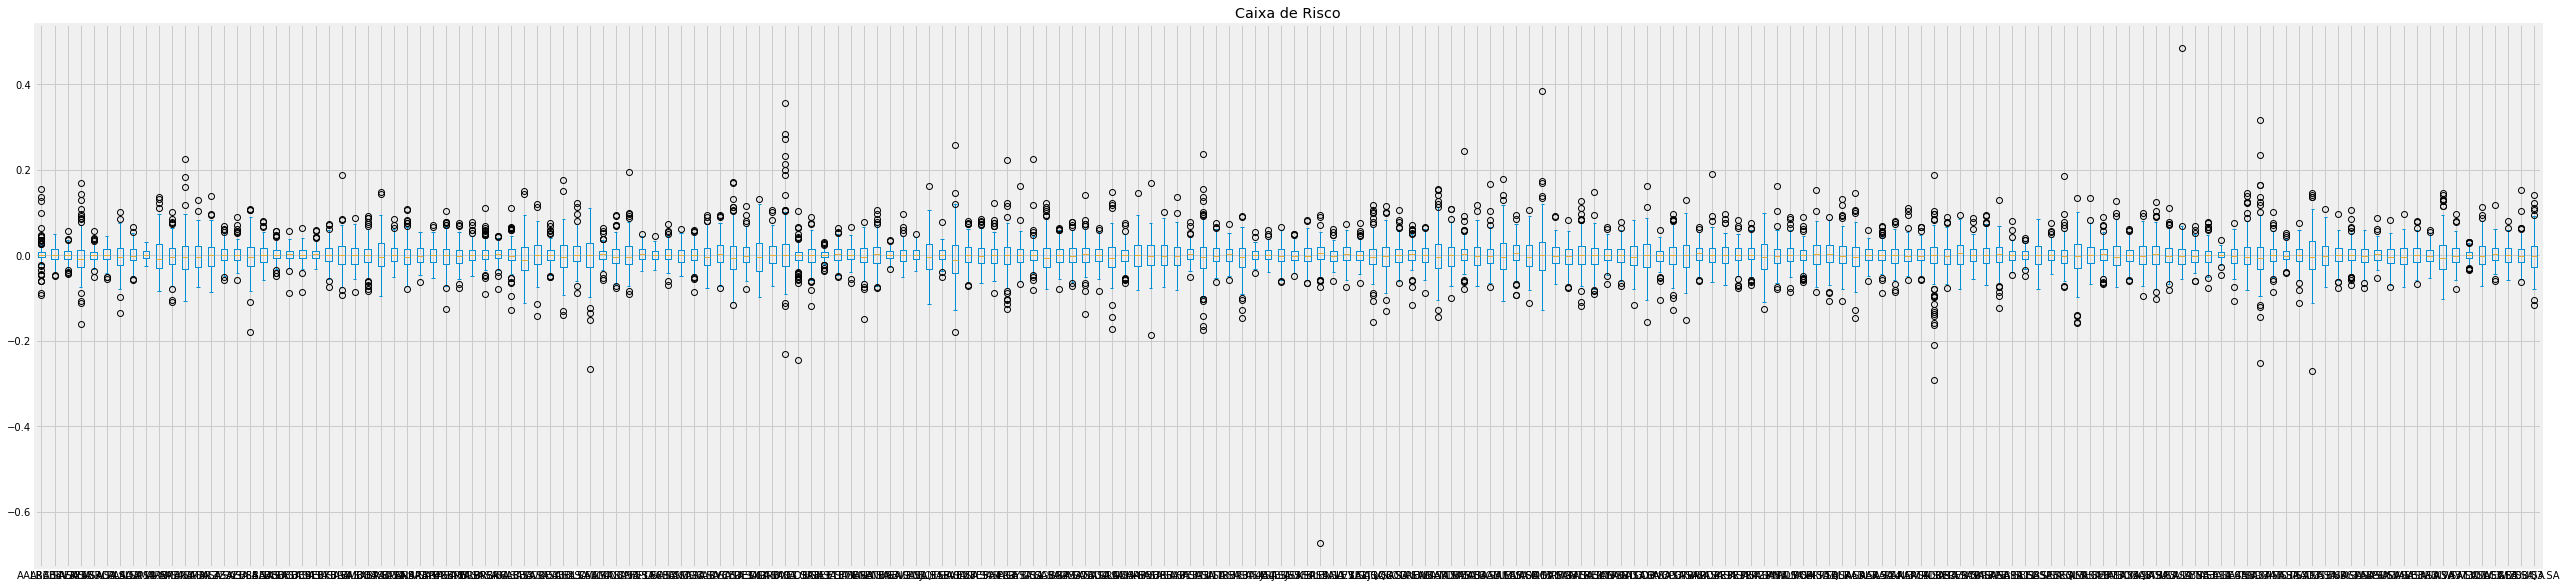

In [ ]:
retorno_diario_simples.plot(kind = "box",figsize = (40,10), title = "Caixa de Risco") #plota a caixa de risco

## Índice de Sharpe

In [ ]:
r=0.1375 #definindo a taxa selic como a livre de risco
df['Sharpe']=(df['retorno anual médio']-r)/df['volatilidade'] #cria uma coluna em df e armaneza o valor do índice

In [ ]:
df=df.sort_values(by=['Cluster_labels','Sharpe'], ascending=False) #ordena de acordo com os clusters e depois de acordo com o índice de sharpe

In [ ]:
#o código a seguir gera o portifólio, isto é, pega os ativos com o maior índice de sharpe de cada cluster
portfolio=[]
for j in list(reversed(range(10))):
  portfolio.append(df[df['Cluster_labels']==j].iloc[:1].index.values.tolist())
portfolio2=[]
for i in portfolio:
  for j in i:
    portfolio2.append(j)

In [ ]:
portfolio2

['KEPL3.SA',
 'BBSE3.SA',
 'ENAT3.SA',
 'BRAP3.SA',
 'DMMO3.SA',
 'IFCM3.SA',
 'HAPV3.SA',
 'CIEL3.SA',
 'AMER3.SA',
 'ITUB4.SA']

In [ ]:
carteira=dados['Adj Close'][portfolio2].dropna() #monta uma carteira com os ativos selecionados com sua série de preços

## Backtest

Fazendo o backtest para determinar a efetividade da estratégia:

In [ ]:
buy_hold = bt.Strategy('Buy&Hold', #estratégia de Buy&Hold com pesos iguais para os ativos
                   [ bt.algos.RunOnce(),
                     bt.algos.SelectAll(),
                     bt.algos.WeighEqually(),
                     bt.algos.Rebalance()]
                    ) 

In [ ]:
bova=yf.download('BOVA11.SA', start="2021-05-06", end="2022-09-24") #aqui baixamos o bova para servir de comparação com o portifolio que criamos

[*********************100%***********************]  1 of 1 completed


In [ ]:
bt1 = bt.Backtest(buy_hold, carteira)

In [ ]:
bt2=bt.Backtest(buy_hold,ibov)

NameError: ignored

In [ ]:
resultados2=bt.run(bt2)
resultados2.display()

In [ ]:
resultados=bt.run(bt1)
resultados.display()

## Conclusões
Conseguimos aplicar a estratégia que gostaríamos e montar nosso portfólio a partir disso. Além disso, vimos que a carteira não performou muito bem no último ano quando rodamos nosso backtest, mas o índice BOVA11 também não garantiu bons resultados.\
Uma observação importante é que a maioria dos ativos não performou bem na janela de tempo estudada, então os resultados do backtest não foram surpreendentes. 


Seguindo o artigo de inspiração para esse trabalho, acreditamos que podemos fazer uso de indicadores financeiros no processo de clusterização para obter ativos melhores na hora de escolher. Então, o próximo passo do projeto é utilizar critérios mais fortes, até mesmo para que possamos chegar a apenas 3 ativos, como é a nossa missão. Além disso, podemos aplicar Markovitz para identificar a proporção que deve ser investido em cada ativo; esperamos que assim possamos obter um retorno maior em relação ao benchmark.